# Querying the image data type from a client

The following is an example of how to query a `pgcv_core.ndarray_int4` from a client. This completes the cycle of storage and retrieval using the proposed extension



Images in Instance table:  1
	Instance UUID: 0a352d08-c0f2-4175-aec5-c036af5d5eb7 	Shape: [1024, 1024]


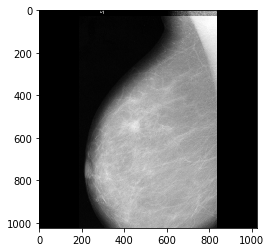

In [2]:
import psycopg2
import numpy as np
import matplotlib.pyplot as plt

conn = psycopg2.connect(database = "test", host = "127.0.0.1", port = "5432")

cur = conn.cursor()
cur.execute("SELECT uuid, (image).shape, (image).data FROM med_img.Instance LIMIT 1")
rows = cur.fetchall()

print("Images in Instance table: ", cur.rowcount)
for row in rows:
    print("\tInstance UUID:", row[0], "\tShape:", row[1])
    img = np.array(row[2]).reshape(row[1]).astype('uint8')
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    
cur.close()

